<a href="https://colab.research.google.com/github/Shriyashzzz/multiplayer-game-pricing-analysis/blob/main/Multiplayer_Games_Market_on_Steam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [420]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [421]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as pltpatch


In [422]:
pd.set_option('display.max_rows', 800)
df = pd.read_csv("/content/drive/My Drive/Colab_Notebooks/CSV_Files/a_steam_data_2021_2025.csv")
df.dropna(subset= [ "categories","price"])

,appid,name,release_year,release_date,genres,categories,price,recommendations,developer,publisher
0,3057270,Seafarer's Gambit,2024,"Jul 5, 2024",Action;Adventure;Indie;RPG;Strategy,Single-player;Family Sharing,3.99,0,Bouncy Rocket Studios,Bouncy Rocket Studios
1,3822840,Capitalist Misadventures,2025,"Jul 25, 2025",Casual;Indie;Simulation;Strategy,Single-player;Save Anytime;Family Sharing,7.99,0,Caramelo Studios,Caramelo Studios
2,3216640,The Beast and the Princess,2025,"Jun 17, 2025",Adventure;Indie;Strategy,Single-player;Steam Achievements;Full controll...,12.99,0,Libragames,Libragames
3,2403620,Air Twister,2023,"Nov 10, 2023",Action;Adventure;Indie,Single-player;Steam Achievements;Full controll...,24.99,0,YS Net,ININ
4,1538040,Horde Slayer,2021,"Mar 19, 2021",Action;Adventure;Casual;Indie;RPG;Early Access,Single-player;Steam Achievements;Full controll...,3.99,0,Wagner Rodrigues,Wagner Rodrigues
...,...,...,...,...,...,...,...,...,...,...
65516,3097010,X Simulator Drone,2024,"Jul 31, 2024",Casual;Indie;Simulation,Single-player;Family Sharing,14.99,0,Inonia Games,Inonia Games
65517,3304930,Retro Dungeon Slayer,2025,"Mar 3, 2025",Action;Indie;Early Access,Single-player;Family Sharing,4.99,0,Hard Shark Games,Hard Shark Games
65518,1461580,Molecule Builder,2021,"Feb 4, 2021",Simulation;Education,Single-player;Tracked Controller Support;VR On...,14.99,0,Xennial Digital,Xennial Digital
65519,1379120,MechNest,2024,"Apr 13, 2024",Action;Indie,Single-player;Partial Controller Support;Famil...,15.99,0,PoisonGames,PoisonGames


##How has the price of multiplayer games increased in the years?


In [423]:
# Clean the category column/make it easy to work with

def get_category(x):
  stripped_str = ""
  for i in range(len(x)):
      if x[i] == ";":
        stripped_str = x[:i]
        return stripped_str

df['categories'] = df['categories'].astype(str).apply(get_category).where(df['categories'].notnull())

In [424]:
df.head(15)

,appid,name,release_year,release_date,genres,categories,price,recommendations,developer,publisher
0,3057270,Seafarer's Gambit,2024,"Jul 5, 2024",Action;Adventure;Indie;RPG;Strategy,Single-player,3.99,0,Bouncy Rocket Studios,Bouncy Rocket Studios
1,3822840,Capitalist Misadventures,2025,"Jul 25, 2025",Casual;Indie;Simulation;Strategy,Single-player,7.99,0,Caramelo Studios,Caramelo Studios
2,3216640,The Beast and the Princess,2025,"Jun 17, 2025",Adventure;Indie;Strategy,Single-player,12.99,0,Libragames,Libragames
3,2403620,Air Twister,2023,"Nov 10, 2023",Action;Adventure;Indie,Single-player,24.99,0,YS Net,ININ
4,1538040,Horde Slayer,2021,"Mar 19, 2021",Action;Adventure;Casual;Indie;RPG;Early Access,Single-player,3.99,0,Wagner Rodrigues,Wagner Rodrigues
5,1724980,The Lone Blade,2023,"May 23, 2023",Action;Adventure;Indie,Single-player,1.99,0,Opia Games,Opia Games;Plug In Digital
6,3822820,Knight Crawler,2025,"Jul 16, 2025",Action;Indie;Free To Play,Single-player,0.00,0,Taylor Conolley,Taylor Conolley
7,3863460,No Sweet Looks,2025,"Aug 28, 2025",Action;Indie,Single-player,2.99,0,halvardo13,halvardo13
8,3216610,League Of Tacticians: Path of Tarkan,2025,"May 21, 2025",Adventure;RPG;Strategy,Single-player,3.99,0,Oba Games,Oba Games
9,3057250,Pennylooter,2025,"Sep 8, 2025",Action;Indie,Single-player,6.99,0,Josh Sellers,Josh Sellers


#Categories of Game uploaded to Steam


In [425]:

df.groupby("categories")["appid"].count()

,appid
categories,
Camera Comfort,1
Captions available,1
Custom Volume Controls,1
Full controller support,1
Keyboard Only Option,1
Multi-player,2561
PvP,1
Single-player,59744
Steam Achievements,7


In [426]:
# Dataframe for just multiplayer games
df_multiplayer = df[df["categories"] == "Multi-player"]
df_multiplayer = df_multiplayer.drop(columns = ["categories"])
df_multiplayer.head(20)

,appid,name,release_year,release_date,genres,price,recommendations,developer,publisher
21,1314230,Battle Dawn 2: Terra Reborn,2022,"Oct 17, 2022",Free To Play;Massively Multiplayer;Strategy,0.00,0,Zero Games Studios,Gato Games
25,1981780,FAMILY BATTLE タッグアリーナ,2022,"Aug 5, 2022",Action;Casual;Indie;Early Access,9.99,0,nekogameteacher,Kodansha
26,3822740,Tactical2,2025,"Aug 30, 2025",Strategy;Free To Play;Early Access,0.00,0,D/Vision Lab s.r.l.,D/Vision Lab s.r.l.
32,2446340,Garestia,2023,"Jun 19, 2023",Free To Play,0.00,0,yugamesplay,yugamesplay
47,3015640,Last Heist,2025,"Aug 2, 2025",Action;Free To Play,0.00,0,D Games,D Games
64,1981740,Palmas,2022,"May 18, 2022",Action;Adventure;Casual;Indie;Massively Multip...,4.99,0,palmasandpazu,palmasandpazu
107,3056870,Solar Sweets,2024,"Aug 6, 2024",Indie;Simulation;Free To Play,0.00,0,PIE Dev Studios,PIE Dev Studios
122,1906220,Мафия Онлайн,2022,"Jul 13, 2022",Action;Indie;Massively Multiplayer;Free To Play,0.00,0,Mafia Games,Mafia Games
124,1254130,Phobies,2022,"Mar 7, 2022",Indie;Strategy;Free To Play,0.00,0,Phobies Holdings Inc.,Phobies Holdings Inc.
142,1724860,胡莱三国3,2021,"Sep 7, 2021",Casual;Free To Play;Massively Multiplayer;Simu...,0.00,0,Huochairen Interactive Entertainment,Huochairen Interactive Entertainment


#Average price of multiplayer games according to each year

In [427]:

# mean price of multiplayer games each year
df_multiplayer_price_avg = df_multiplayer.groupby("release_year")["price"].mean()
df_multiplayer_price_avg

,price
release_year,
2021,3.773574
2022,3.728776
2023,3.015760
2024,3.496328
2025,3.845801


# Let us explore and take a look at the trend for multiplayer games each year

In [428]:
def get_month(release_date):
  stripped_str = ""
  for i in range(len(release_date)):
    if release_date[i] == " ":
      stripped_str = release_date[:i]
      return stripped_str

def keep_only_date(release_date):
  stripped_str = ""
  if release_date[:3] == "Q4":
    return "Q4"
  else:
    if len(release_date) == 12:
      return release_date[4:6]
    else:
      return release_date[4:5]





In [429]:
#getting the aggregate release month
df_multiplayer["release_month"] = df_multiplayer["release_date"].astype(str).apply(get_month).where(df_multiplayer["release_date"].notnull())
# replacing the release date with only rh actual date
df_multiplayer["release_date"] = df_multiplayer["release_date"].astype(str).apply(keep_only_date).where(df_multiplayer["release_date"].notnull())

In [430]:
#quick look at the multiplayer only DataFrame with Clean Month & Date Release
df_multiplayer

,appid,name,release_year,release_date,genres,price,recommendations,developer,publisher,release_month
21,1314230,Battle Dawn 2: Terra Reborn,2022,17,Free To Play;Massively Multiplayer;Strategy,0.00,0,Zero Games Studios,Gato Games,Oct
25,1981780,FAMILY BATTLE タッグアリーナ,2022,5,Action;Casual;Indie;Early Access,9.99,0,nekogameteacher,Kodansha,Aug
26,3822740,Tactical2,2025,30,Strategy;Free To Play;Early Access,0.00,0,D/Vision Lab s.r.l.,D/Vision Lab s.r.l.,Aug
32,2446340,Garestia,2023,19,Free To Play,0.00,0,yugamesplay,yugamesplay,Jun
47,3015640,Last Heist,2025,2,Action;Free To Play,0.00,0,D Games,D Games,Aug
...,...,...,...,...,...,...,...,...,...,...
65390,2404100,女王,2024,11,Action;Adventure;Casual;Massively Multiplayer;...,0.00,0,做世界,做世界,Jun
65412,2267480,Sandbox War Dispatch,2023,24,Indie;RPG;Simulation;Strategy,3.99,0,CoreyGameDev,CoreyGameDev,Jan
65450,3601700,Soul Slasher,2025,12,Action;Casual;Indie;Free To Play,0.00,0,Microtale Games,Microtale Games,Sep
65490,1461600,Project Sparrow,2022,11,Action;Indie;Early Access,9.99,1082,Inspire Game Studios,Inspire Game Studios,Mar


In [431]:

## gtouping each DataFrame by each year

df_mp_2021 = df_multiplayer[df_multiplayer["release_year"] == 2021]
df_mp_2022 = df_multiplayer[df_multiplayer["release_year"] == 2022]
df_mp_2023= df_multiplayer[df_multiplayer["release_year"] == 2023]
df_mp_2024 = df_multiplayer[df_multiplayer["release_year"] == 2024]
df_mp_2025 = df_multiplayer[df_multiplayer["release_year"] == 2025]


# grouping by release Month & the average Price of the Games
months_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Nov", "Dec"]
groups = {}
for year in range(2021, 2026):
    df_year = df_multiplayer[df_multiplayer["release_year"] == year]

    groups[year] = (
        df_year
        .groupby("release_month")["price"]
        .mean()
        .reindex(months_order)
    )

In [432]:
df_mp_2021.head(5)

,appid,name,release_year,release_date,genres,price,recommendations,developer,publisher,release_month
142,1724860,胡莱三国3,2021,7,Casual;Free To Play;Massively Multiplayer;Simu...,0.00,0,Huochairen Interactive Entertainment,Huochairen Interactive Entertainment,Sep
147,1254120,Bless Unleashed,2021,6,Action;Massively Multiplayer;RPG;Free To Play,0.00,210,VALOFE,VALOFE,Aug
742,1737480,Super,2021,9,Action,1.99,0,Fire Game Studios,Fire Game Studios,Sep
801,1665070,Squad Of Dangerous,2021,2,Action;Indie;Strategy;Early Access,2.99,0,CPITeam,CPITeam,Jul
888,1543100,Farmers Co-op: Out of This World,2021,1,Casual,12.99,0,"Rising Win Tech. CO., LTD",CGS International Inc.,Sep


In [433]:
#trying to see standard deviation

mp_games_price_std = {}

for i in range(2021, 2026):
  mp_games_price_std[i] = round(df_multiplayer[df_multiplayer["release_year"] == i]["price"].std(), 2)

mp_games_price_std

{2021: 6.39, 2022: 6.8, 2023: 6.42, 2024: 6.01, 2025: 6.59}

#Yearly Trends in Average Prices of Multiplayer Games by Release Month

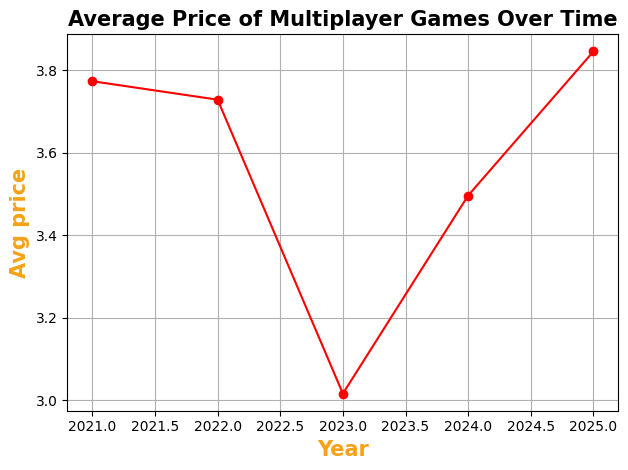

In [434]:
plt.plot(df_multiplayer_price_avg.index, df_multiplayer_price_avg.values, color = "red", marker = "o")

plt.xlabel("Year", fontsize = 15, fontweight = "bold", color= "#F5A216")
plt.ylabel("Avg price", fontsize = 15, fontweight = "bold", color = "#F5A216")
plt.title("Average Price of Multiplayer Games Over Time", fontsize = 15, fontweight = "bold" )
plt.tight_layout()
plt.grid(axis = "both")
plt.show()

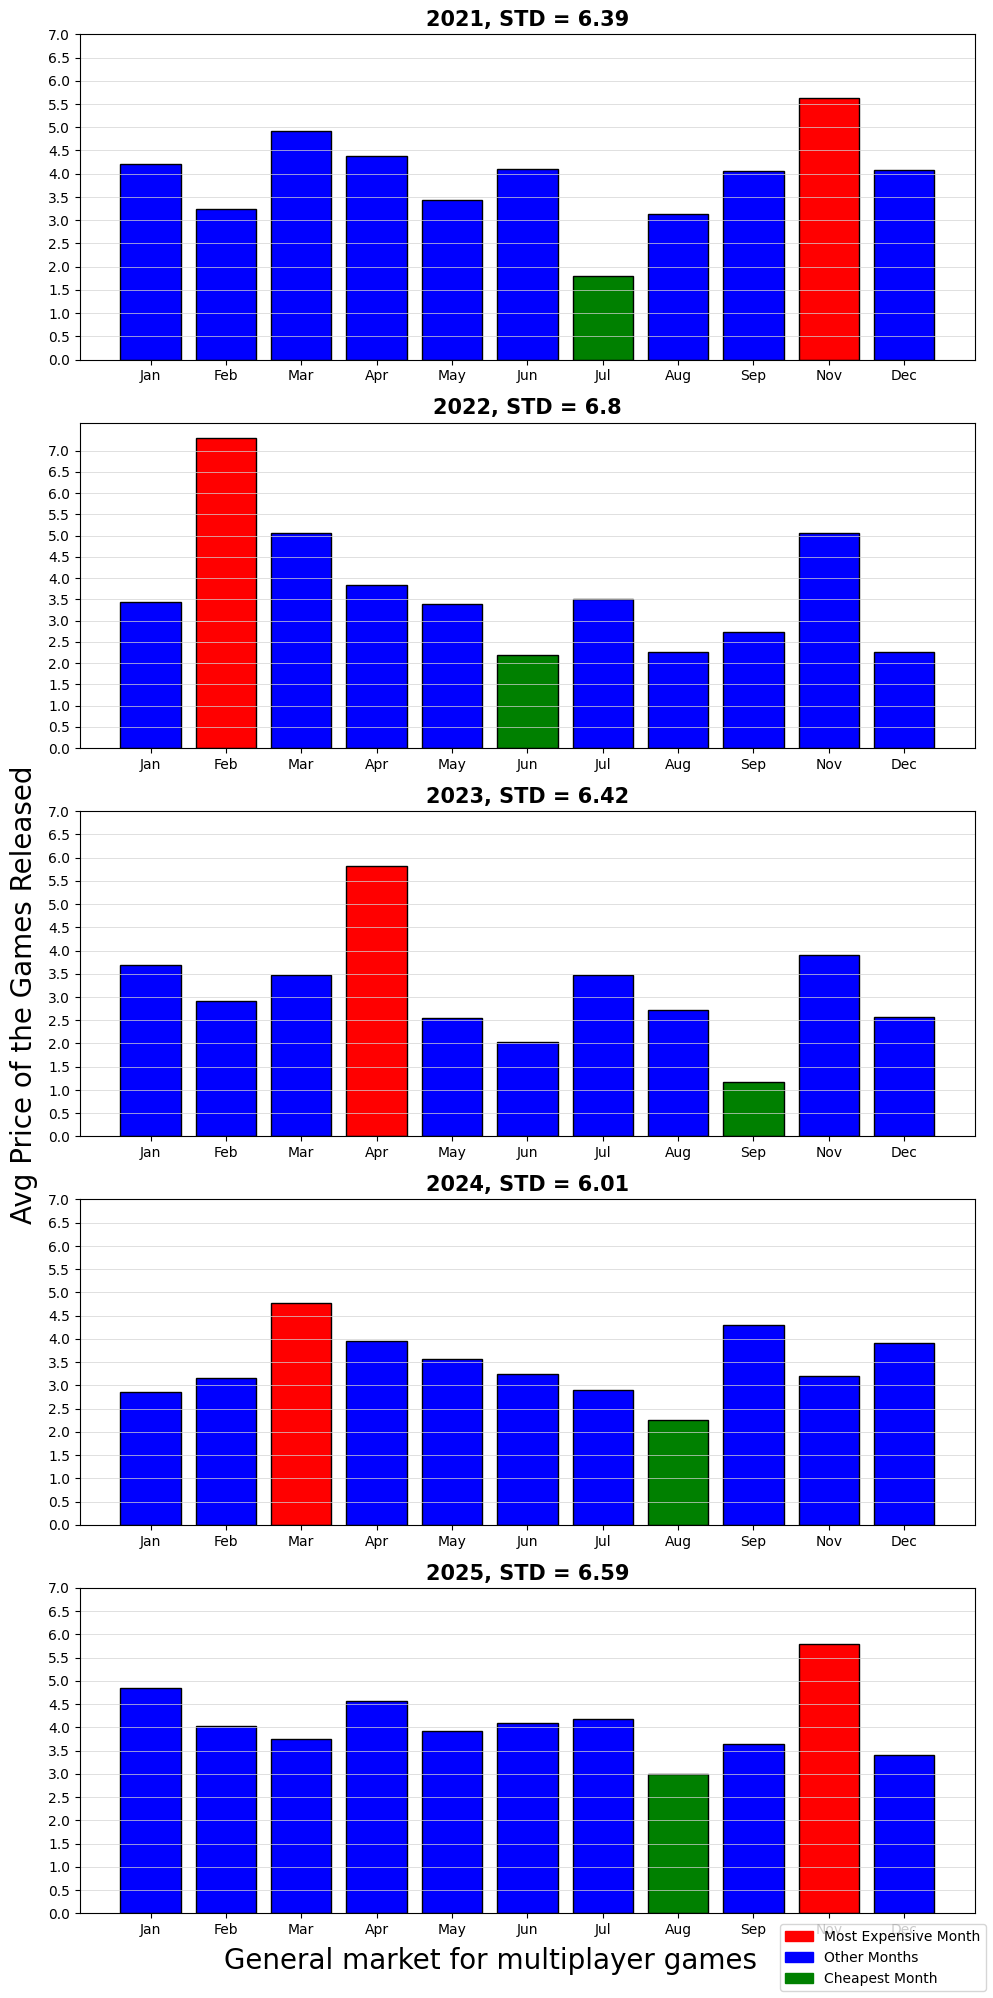

In [435]:
figure, axes = plt.subplots(5, 1)
figure.set_size_inches(10, 20)

for i in np.arange(0,5, 1):
  max_month = groups[2020+(i+1)].idxmax()
  min_month = groups[2020+(i+1)].idxmin()


  colors = []  # list that will store the color of each bar for the axes!
  for month in groups[(2020+(i+1))].index:
      if month == max_month:
            colors.append('red')   # highlight the most expensive month
      elif month == min_month:
        colors.append('green')
      else:
            colors.append('blue')  # all other months in blue
  # makes the bar graph each axis
  axes[i].bar(groups[(2020+(i+1))].index, groups[2020+(i+1)].values, edgecolor = "black", color = colors)

#sets up the figure with correct ticks and titles
for i in range(5):
  axes[i].set_yticks(np.arange(0,7.5,0.5))
  axes[i].set_title(str(2020+(i+1)) + ", STD = " + str(mp_games_price_std[2020 +(i+1)]) , fontsize = 15, fontweight = "bold")
  axes[i].grid(axis = "y", linewidth = 0.5, color = "lightgrey")

red_patch = pltpatch.Patch(color='red', label='Most Expensive Month')
blue_patch = pltpatch.Patch(color = 'blue', label = 'Other Months')
green_patch = pltpatch.Patch(color = 'green', label = 'Cheapest Month')
figure.legend(handles = [red_patch, blue_patch, green_patch], loc = "lower right")
figure.supxlabel("General market for multiplayer games", fontsize = 20, color = "black")
figure.supylabel("Avg Price of the Games Released", fontsize = 20, color = "black")

plt.tight_layout()

plt.show()

#1. Reading the graphs:

*   Between 2021 and 2025, the lowest average game prices occurred in 2022–2024.

* Games released from June to September tend to be the cheapest, with August showing the lowest prices in the past two years. Future trends may follow a similar pattern, suggesting a potential correlation between release month and game price.

* The relatively high standard deviation relative to the mean is influenced by the presence of free-to-play titles, which increase price variability when combined with full-priced releases.

* Note that these conclusions are for multiplayer games only!

#2. Report to the graph/ readings above if you are tring to analyze:

* real consumer choices

* overall market behavior on how much on average a game would cost a real gamer



**as a real consumer would have choices to play the free games as much as they do with the paid games.**

In [436]:
#let us only see the paid games in the market.

print("There were " + str(len(df_multiplayer[df_multiplayer["price"] != 0])) + " paid games in the steam market in between 2021 and 2025" )
print("There were " + str(len(df_multiplayer[df_multiplayer["price"] == 0])) + " free games in the steam market in between 2021 and 2025" )


There were 1225 paid games in the steam market in between 2021 and 2025
There were 1336 free games in the steam market in between 2021 and 2025


#This section focuses on the seasonal pricing patterns of publishers offering paid multi-player game releases.


In [440]:
df_mp_p2p = df_multiplayer[df_multiplayer["price"] != 0]

In [441]:
df_mp_p2p_agg_price = df_mp_p2p.groupby("release_year")["price"].mean()

# Likewise let us try and see the trends more in depth each month for each years for P2P(Pay To Play) Games.



In [442]:
df_mp_p2p.T

,25,64,503,603,665,684,693,742,748,774,...,65075,65138,65170,65253,65299,65301,65314,65359,65412,65490
appid,1981780,1981740,3465050,2402720,2402620,3600050,3861980,1737480,2598020,2202150,...,1789480,1461810,2769110,1254410,2204560,2768520,3097560,1599220,2267480,1461600
name,FAMILY BATTLE タッグアリーナ,Palmas,Bloop,Axe Me Down,World Guesser,Animal Games,Croc Royale,Super,Spire Horizon Online,NOT ME,...,Marauders,《蜀山：初章》买断版,Line of Fire - Pirate Waltz,破阵图(Grids of World),Mineral Madness,Jousting in January,Liar's Bar,League Space,Sandbox War Dispatch,Project Sparrow
release_year,2022,2022,2025,2023,2025,2025,2025,2021,2024,2023,...,2022,2022,2025,2021,2025,2024,2024,2021,2023,2022
release_date,5,18,8,25,18,12,15,9,6,2,...,3,17,10,23,10,4,2,26,24,11
genres,Action;Casual;Indie;Early Access,Action;Adventure;Casual;Indie;Massively Multip...,Casual;Indie;Strategy,Action;Casual;Indie,Casual;Early Access,Casual;Indie;Sports,Action,Action,Action;Adventure;Casual;Indie;Massively Multip...,Adventure;Casual;Simulation;Early Access,...,Action;Early Access,Massively Multiplayer,Action;Adventure;Casual;Simulation;Early Access,Action;Adventure;Indie;RPG;Strategy,Action,Action,Casual;Indie;Simulation;Strategy;Early Access,Action;Free To Play;Massively Multiplayer;Raci...,Indie;RPG;Simulation;Strategy,Action;Indie;Early Access
price,9.99,4.99,9.99,0.99,11.99,0.99,7.99,1.99,3.99,19.99,...,29.99,24.99,4.99,0.99,7.99,0.99,6.99,11.99,3.99,9.99
recommendations,0,0,0,0,0,0,0,0,311,0,...,13304,5777,0,0,0,0,45893,0,0,1082
developer,nekogameteacher,palmasandpazu,Ducktastic,Harmonika Games,Artists Company,Christopher V. Costello,To8et Studios,Fire Game Studios,Mendoka,storm game,...,Small Impact Games,重楼工作室,Ige Olwen,IncreZero Studio,Whacky Mole Studio,Magic Rock Software,Curve Animation,EURO GAMES STUDIO,CoreyGameDev,Inspire Game Studios
publisher,Kodansha,palmasandpazu,NightPixel Games,Harmonika Games,Artists Company,ChristopherCgaming llc 2021,To8et Studios,Fire Game Studios,Mendoka,storm game,...,NaN,重楼工作室,HAELE 3D,IncreZero Studio,Whacky Mole Studio,Magic Rock Software,Curve Animation,EURO GAMES STUDIO (ESP),CoreyGameDev,Inspire Game Studios
release_month,Aug,May,Jun,May,Jul,Apr,Aug,Sep,Dec,Mar,...,Oct,Nov,Feb,Apr,Nov,Feb,Oct,Sep,Jan,Mar


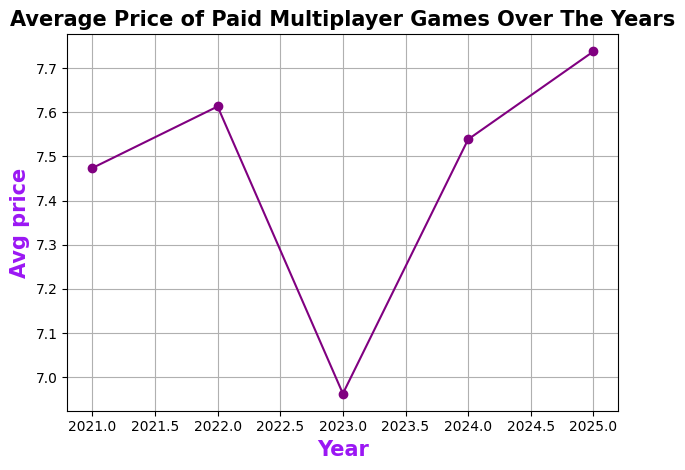

In [443]:
plt.plot(df_mp_p2p_agg_price.index, df_mp_p2p_agg_price.values, color = "purple", marker = "o")
plt.title("Average Price of Paid Multiplayer Games Over The Years", fontsize = 15, fontweight = "bold" )
plt.xlabel("Year", fontsize = 15, fontweight = "bold", color = "#9B17F4")
plt.ylabel("Avg price", fontsize = 15, fontweight = "bold", color = "#9B17F4")
plt.tight_layout()
plt.grid(axis = "both")
plt.show()

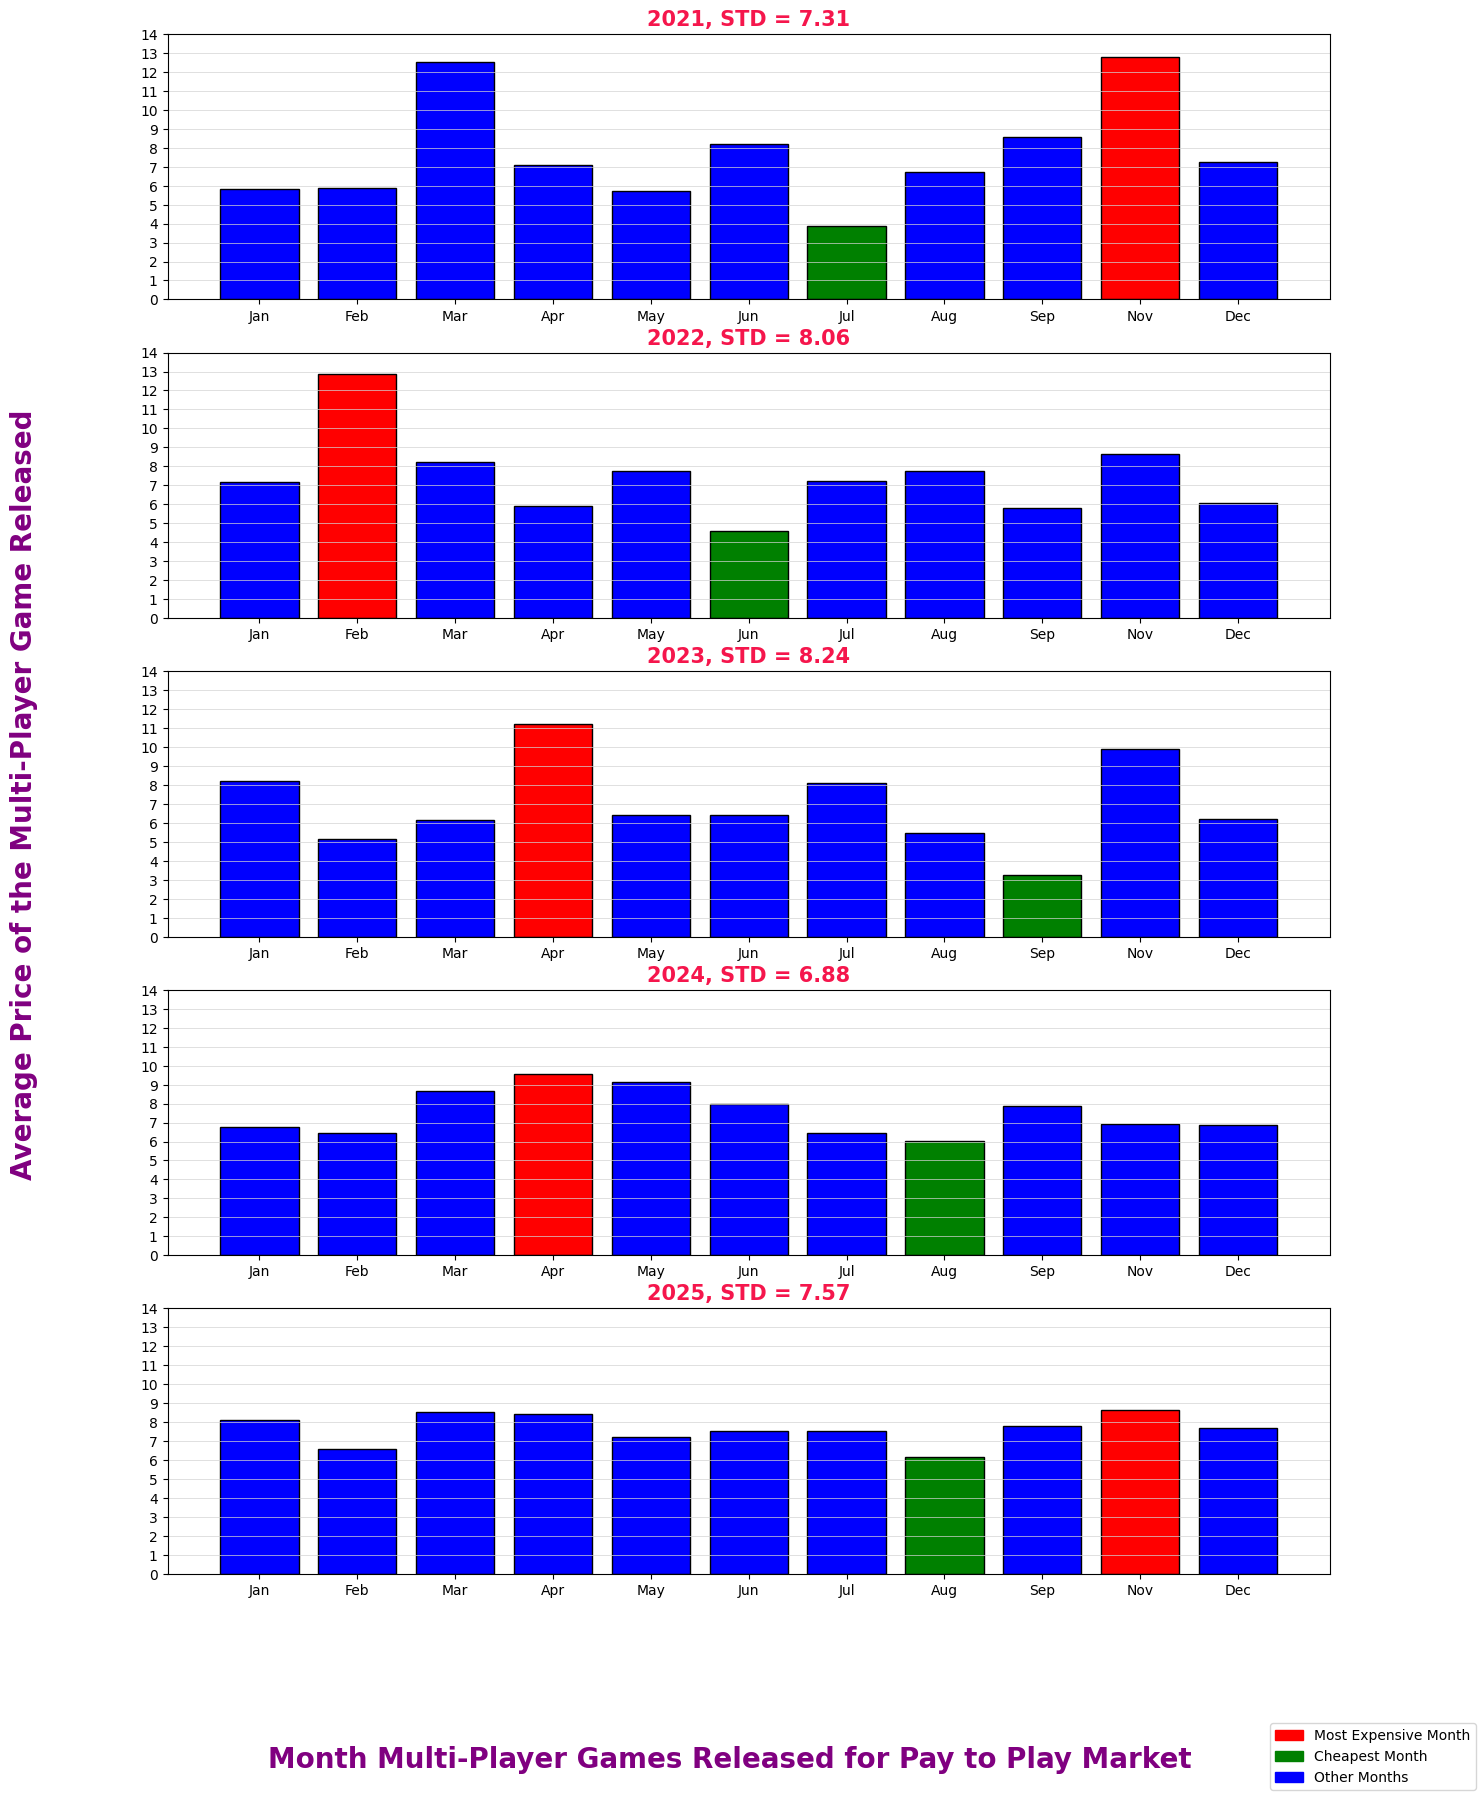

In [445]:
figure, axes = plt.subplots(5,1)
#getting the data

group_p2p = {}
std_p2p = {}


for year in range(2021, 2026, 1):
  group_p2p[year] = df_mp_p2p[df_mp_p2p["release_year"] == year].groupby("release_month")["price"].mean().reindex(months_order)
  std_p2p[year] = round(df_mp_p2p[df_mp_p2p["release_year"] == year]["price"].std(), 2)





#customization
for i in range(0,5,1):
  max_month = group_p2p[2020+(i+1)].idxmax()
  min_month = group_p2p[2020+(i+1)].idxmin()
  p2p_bar_color = []

  for month in months_order:
    if month == max_month:
      p2p_bar_color.append("red")
    elif month == min_month:
      p2p_bar_color.append("green")
    else:
      p2p_bar_color.append("blue")


  axes[i].grid(axis ="y", linewidth = 0.5, color = "lightgray")

  #plotting the axes
  axes[i].bar(group_p2p[2020+(i+1)].index, group_p2p[2020+(i+1)].values, color = p2p_bar_color, edgecolor = "black")






# customization of the axes
figure.set_size_inches(15,20)
for i in range(0,5,1):
  axes[i].set_yticks(np.arange(0,15,1))
  axes[i].set_title(str(2020 + (i+1))+ ", STD = " + str(std_p2p[2020 +(i+1)]), fontsize = 15, fontweight = "bold", color = "#F5164C")

figure.legend(handles=[red_patch, green_patch, blue_patch], loc = "lower right")

figure.supxlabel("Month Multi-Player Games Released for Pay to Play Market", fontsize = 20, fontweight = "bold", color = "purple")
figure.supylabel("Average Price of the Multi-Player Game Released",fontsize = 20, fontweight = "bold", color = "purple")
plt.tight_layout
plt.show()


In [ ]:
# Calculate fluctuation statistics for the general multiplayer market (df_multiplayer)
fluctuation_stats = {}

for year in range(2021, 2026):
    # Filter for the year
    df_year = df_multiplayer[df_multiplayer["release_year"] == year]

    # Calculate monthly averages
    monthly_avg = df_year.groupby("release_month")["price"].mean()

    max_avg = monthly_avg.max()
    min_avg = monthly_avg.min()
    spread = max_avg - min_avg
    overall_mean = df_year["price"].mean()
    std_dev = df_year["price"].std()

    fluctuation_stats[year] = {
        "Min Monthly Avg": round(min_avg, 2),
        "Max Monthly Avg": round(max_avg, 2),
        "Spread (Fluctuation)": round(spread, 2),
        "Overall Year Mean": round(overall_mean, 2),
        "Std Dev": round(std_dev, 2)
    }

# Display the stats dataframe
fluctuation_df = pd.DataFrame(fluctuation_stats).T
print("--- Gneneral Multiplayer Market Statistics ---")
fluctuation_df

--- Gneneral Multiplayer Market Statistics ---


,Min Monthly Avg,Max Monthly Avg,Spread (Fluctuation),Overall Year Mean,Std Dev
2021,1.80,5.64,3.84,3.77,6.39
2022,2.20,7.29,5.10,3.73,6.80
2023,1.18,5.81,4.63,3.02,6.42
2024,2.26,4.77,2.51,3.50,6.01
2025,0.00,5.80,5.80,3.85,6.59


In [ ]:
# Calculate fluctuation statistics for the PAID multiplayer market (df_mp_p2p)
fluctuation_stats_p2p = {}

for year in range(2021, 2026):
    # Filter for the year
    df_year = df_mp_p2p[df_mp_p2p["release_year"] == year]

    # Calculate monthly averages
    monthly_avg = df_year.groupby("release_month")["price"].mean()

    max_avg = monthly_avg.max()
    min_avg = monthly_avg.min()
    spread = max_avg - min_avg
    overall_mean = df_year["price"].mean()
    std_dev = df_year["price"].std()

    fluctuation_stats_p2p[year] = {
        "Min Monthly Avg": round(min_avg, 2),
        "Max Monthly Avg": round(max_avg, 2),
        "Spread (Fluctuation)": round(spread, 2),
        "Overall Year Mean": round(overall_mean, 2),
        "Std Dev": round(std_dev, 2)
    }

# Display the stats dataframe for Paid Games
fluctuation_df_p2p = pd.DataFrame(fluctuation_stats_p2p).T
print("--- Paid Multiplayer Market Statistics ---")
fluctuation_df_p2p

--- Paid Multiplayer Market Statistics ---


,Min Monthly Avg,Max Monthly Avg,Spread (Fluctuation),Overall Year Mean,Std Dev
2021,3.90,12.81,8.91,7.47,7.31
2022,4.57,12.87,8.31,7.61,8.06
2023,3.26,11.20,7.95,6.96,8.24
2024,6.03,9.55,3.52,7.54,6.88
2025,6.17,8.64,2.47,7.74,7.57


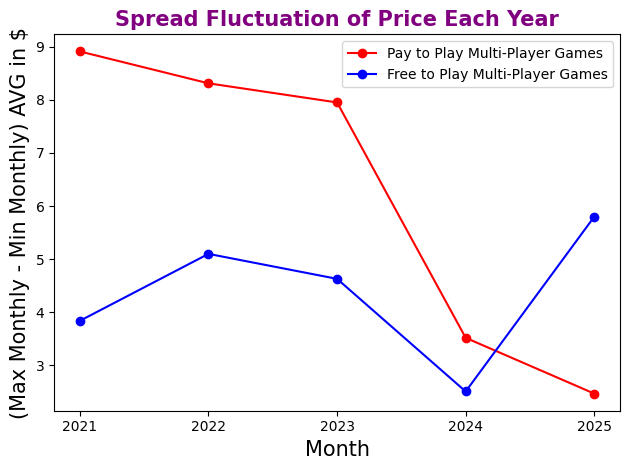

In [473]:
plt.plot(fluctuation_df_p2p.index, fluctuation_df_p2p["Spread (Fluctuation)"],  color = "red", marker ="o", label = "Pay to Play Multi-Player Games")
plt.plot(fluctuation_df.index, fluctuation_df["Spread (Fluctuation)"], color = "blue", marker ="o", label = "Free to Play Multi-Player Games" )
plt.xticks(fluctuation_df_p2p.index)
plt.xlabel("Month", fontsize = 15)
plt.ylabel("(Max Monthly - Min Monthly) AVG in $", fontsize = 15)
plt.title("Spread Fluctuation of Price Each Year", fontsize = 15, fontweight = "bold", color = "purple")
plt.tight_layout()
plt.legend()
plt.show()

# My Readings:

## 1. Stability vs. Volatility

**Yearly Stability:**  
The average price of paid multiplayer games has remained fairly stable over the last five years, hovering around \$7.50–\$7.75, with a slight dip in 2023. This suggests that the overall "cost of entry" for paid multiplayer games hasn’t increased significantly.

**Minimum Cost Of Entry to Steam Ecosystem:**

Obviously, the minimum cost for the genral multiplayer games is 0, but if you go to the pay 2 play market, ACD the minimum cost of entry is approximately $7.00.

**Monthly Volatility:**  
Despite stable yearly averages, the paid market is more volatile month-to-month than the general market. The difference between the cheapest and most expensive months ("Spread") for paid games ranged over \$8 from 2021–2023. In contrast, the general market fluctuates by only \$3–\$5. This indicates that the timing of major releases strongly impacts monthly averages.

---

## 2. The “Free” Buffer in the General Market

The general multiplayer market (including free-to-play games) appears smoother because the large number of \$0.00 titles acts as a stabilizing anchor. High-priced releases are diluted by the abundance of free games, resulting in lower standard deviation and smaller spreads.

---

## 3. Market Composition

- Paid games: ~1,225 titles  
- Free games: ~1,336 titles  

This near-equal split means that statistics like "average price" for the full market are heavily skewed by free games. In the paid segment, the high standard deviation (often equal to or greater than the mean) indicates a polarized market: affordable indie titles (\$5–\$15) versus full-priced AAA releases (\$60+).

---

## 4. Seasonal Trends

**I know this is what you are here to read**

- **Free game/Cheap games:** Lower price releases tend to occur in summer (June–August). duh, everyone knows you get summer sales on steam.But hey look, now it's statistically proved so viola! ;)  
- **Paid games:** Peaks in average price often occur in months like February, April, or November, likely driven by major AAA releases. This is when you dont want to buy games. unless your rich, in that case, why are you even here? jk  

*Note: Correlation does not imply causation.*

---

## 5. Strategic Takeaways for Gamers

1. **For general multiplayer games:** Summer is often the best time to find cheap or free releases.  
2. **For paid games:** To be fair, Pricing is stable year-round. Timing purchases based on “average release month” could be less effective than waiting for sales (e.g., Winter or Summer Steam Sales). So don't come at me if you see the game you buy on sale few weeks later on winter/summer sale. :p
3. **Market Observation:** High standard deviation confirms a polarized market—consumers/ or plarized publishers as they often choose to release between cheap indie titles and high-priced AAA releases. just like middle-class people in the real-world, the ones in between are ignored here too.

---

 **Conclusion:**  
- Paid multiplayer games in average have stable yearly release pricing but high monthly variability.  
- Free games stabilize the general market’s averages.(steam probably uses that to make sure no users leave their eco-system. Something we've seen Epic Games try.  
- For paid quality titles, like the Upcoming AAA GTA 6, or the previous CyberPunk. Waiting for sales is more important than timing purchases by release month, as the Standard deviation even
